<h2>Importeren/Manipuleren van het DataFrame</h2>

In [19]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import numpy as np

# Read CSV file
df = pd.read_csv('/datc/parcel/notebooks/data/postnl/20200904_sample.csv', index_col=0, parse_dates=[1])

# Manipulate data
df['jaar'] = df['procesdag'].dt.year
new_df = df.groupby([df['cust_id'], df['jaar']]).agg(
    totaal_aantal_pakketten = ('aantal_pakketten', 'sum'),
    totaal_aantal_pakketten_volgende_dag = ('aantal_pakketten_volgende_dag', 'sum')
).reset_index()

cust1 = new_df['totaal_aantal_pakketten'].where(new_df['cust_id'] == 'klant_1').dropna().to_numpy()
cust2 = new_df['totaal_aantal_pakketten'].where(new_df['cust_id'] == 'klant_2').dropna().to_numpy()
cust3 = new_df['totaal_aantal_pakketten'].where(new_df['cust_id'] == 'klant_3').dropna().to_numpy()
cust4 = new_df['totaal_aantal_pakketten'].where(new_df['cust_id'] == 'klant_4').dropna().to_numpy()
cust5 = new_df['totaal_aantal_pakketten'].where(new_df['cust_id'] == 'klant_5').dropna().to_numpy()
cust6 = new_df['totaal_aantal_pakketten'].where(new_df['cust_id'] == 'klant_6').dropna().to_numpy()

<h2>Hulp methoden</h2>

In [20]:
# Format X for a given position to millions notation 
def millions_formatter(x, pos) :
    return '%1.1fM' % (x * 1e-6)

<h2>Plotten</h2>

<h3>Bronen</h3> 

- Multi barplot: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
- Stacked barplot: https://www.weirdgeek.com/2018/11/plotting-stacked-bar-graph/

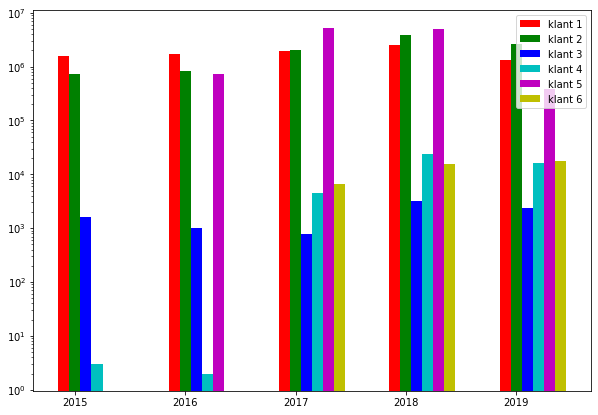

In [21]:

# Define subplots
fig, ax = plt.subplots(figsize=(10,7))
barWidth = 0.10

# Define bar positions
"""The position of every adjacent bar is determined by the position of the precious bar, plus the barwidth"""
br1 = np.arange(5)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

# Define plots
ax.bar(br1, cust1, color='r', width=barWidth, label='klant 1')
ax.bar(br2, cust2, color='g', width=barWidth, label='klant 2')
ax.bar(br3, cust3, color='b', width=barWidth, label='klant 3')
ax.bar(br4, cust4, color='c', width=barWidth, label='klant 4')
ax.bar(br5, cust5, color='m', width=barWidth, label='klant 5')
ax.bar(br6, cust6, color='y', width=barWidth, label='klant 6')

# Customize plot
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.xticks([r + barWidth for r in range(len(cust1))],
          ['2015', '2016', '2017', '2018', '2019'])
#plt.yticks(np.arange(0, (6 * 1e6) + 5 * 1e5, 5 * 1e5))
plt.yscale('log')
plt.legend()
plt.show()

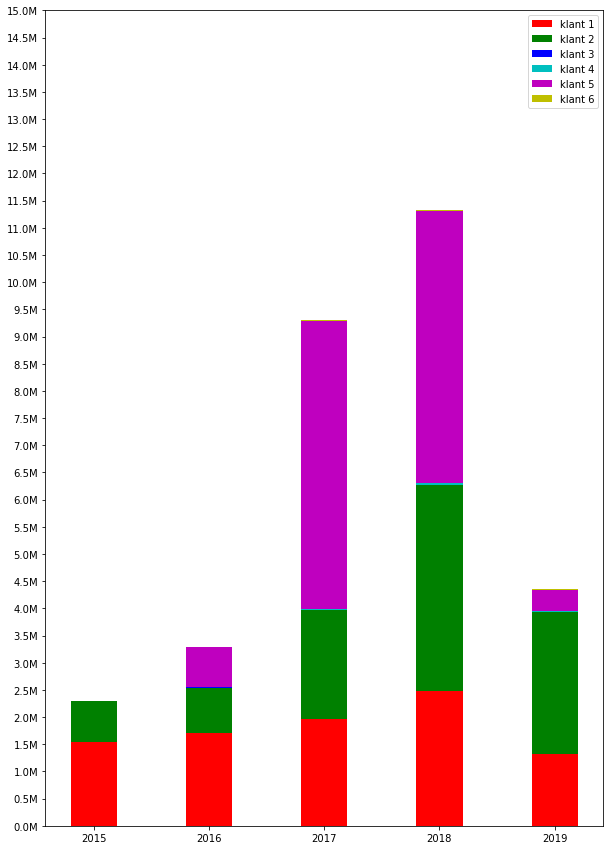

In [22]:
# Define subplots
fig, ax = plt.subplots(figsize=(10,15))

# Set plot measures
width = 0.40
partitions = np.arange(5)

# Define plots
ax.bar(partitions, cust1, color='r', width=width, label='klant 1')
ax.bar(partitions, cust2, color='g', width=width, label='klant 2', bottom=cust1)
ax.bar(partitions, cust3, color='b', width=width, label='klant 3', bottom=cust2+cust1)
ax.bar(partitions, cust4, color='c', width=width, label='klant 4', bottom=cust3+cust2+cust1)
ax.bar(partitions, cust5, color='m', width=width, label='klant 5', bottom=cust4+cust3+cust2+cust1)
ax.bar(partitions, cust6, color='y', width=width, label='klant 6', bottom=cust5+cust4+cust3+cust2+cust1)

# Customize plots
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.xticks(partitions, ('2015', '2016', '2017', '2018', '2019'))
plt.yticks(np.arange(0, (15 * 1e6) + 5 * 1e5, 5 * 1e5))
plt.legend()
plt.show()

<h2>Conclusie</h2>

De bovenstaande grafieken zijn niet heel hulpzaam omdat er een heel groot verschil bestaat in het totaal aantal pakketten voor sommige klanten. Zo heeft klant 1 rond de 1.5 miljoen pakketten verwerkt in 2015, terwijl dit erbij klant 3 rond de 1500 zijn. Daarnaast is de verhouding van het aantal pakketten tussen de verschillende klanten ook totaal niet interessant.